In [ ]:
# The following are commands I use in the terminal on my MacBook Air.
# I converted ASV tables based on the frequency data files Zymo Research provided. 
# I ultimately visulaized the results using Python packages. "--table-type='OTU table'" rather than "ASV table" is used only as convention.
# The outcome is the same.

# I used the ASV abundace data file generated from the Zymo analysis pipeline. 
# I removed the juvinile's data from the table prior to this biplot analysis.

# Convert a TSV file to a BIOM file in HDF5 format. 
# The --table-type flag is set to "OTU table" by default.
# Convert TSV to BIOM format
biom convert -i /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/ASV_Table.tsv -o /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/ASV_Table.biom --to-hdf5 --table-type="OTU table"

# Import BIOM to QIIME2
qiime tools import \
--type 'FeatureTable[Frequency]' \
--input-path /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/ASV_Table.biom \
--output-path /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/feature-table.qza

# Calculate beta diversity using Bray-Curtis
qiime diversity beta \
--i-table /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/feature-table.qza \
--p-metric braycurtis \
--o-distance-matrix /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/bray-curtis-matrix.qza

# Convert distance matrix to PCoA
qiime diversity pcoa \
--i-distance-matrix /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/bray-curtis-matrix.qza \
--o-pcoa /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/bray-curtis-pcoa.qza

# Calculate relative frequencies
qiime feature-table relative-frequency \
--i-table /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/feature-table.qza \
--o-relative-frequency-table /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/feature-table-relative.qza

# Create a biplot
qiime diversity pcoa-biplot \
--i-pcoa /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/bray-curtis-pcoa.qza \
--i-features /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/feature-table-relative.qza \
--o-biplot /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/bray-curtis-biplot.qza

qiime emperor biplot \
--i-biplot /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/bray-curtis-biplot.qza \
--m-sample-metadata-file /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/Metadata.tsv \
--o-visualization /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/bray-curtis-pcoa-emperor.qzv


# Create an Emperor plot
qiime emperor plot \
--i-pcoa /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/bray-curtis-biplot.qza \
--m-metadata-file /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/Metadata.tsv \
--o-visualization /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/bray-curtis-pcoa-emperor.qzv

# Export the biplot for further analysis (optional)
qiime tools export \
--input-path /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/bray-curtis-biplot.qza \
--output-path /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/PERM/exported-bray-curtis-biplot


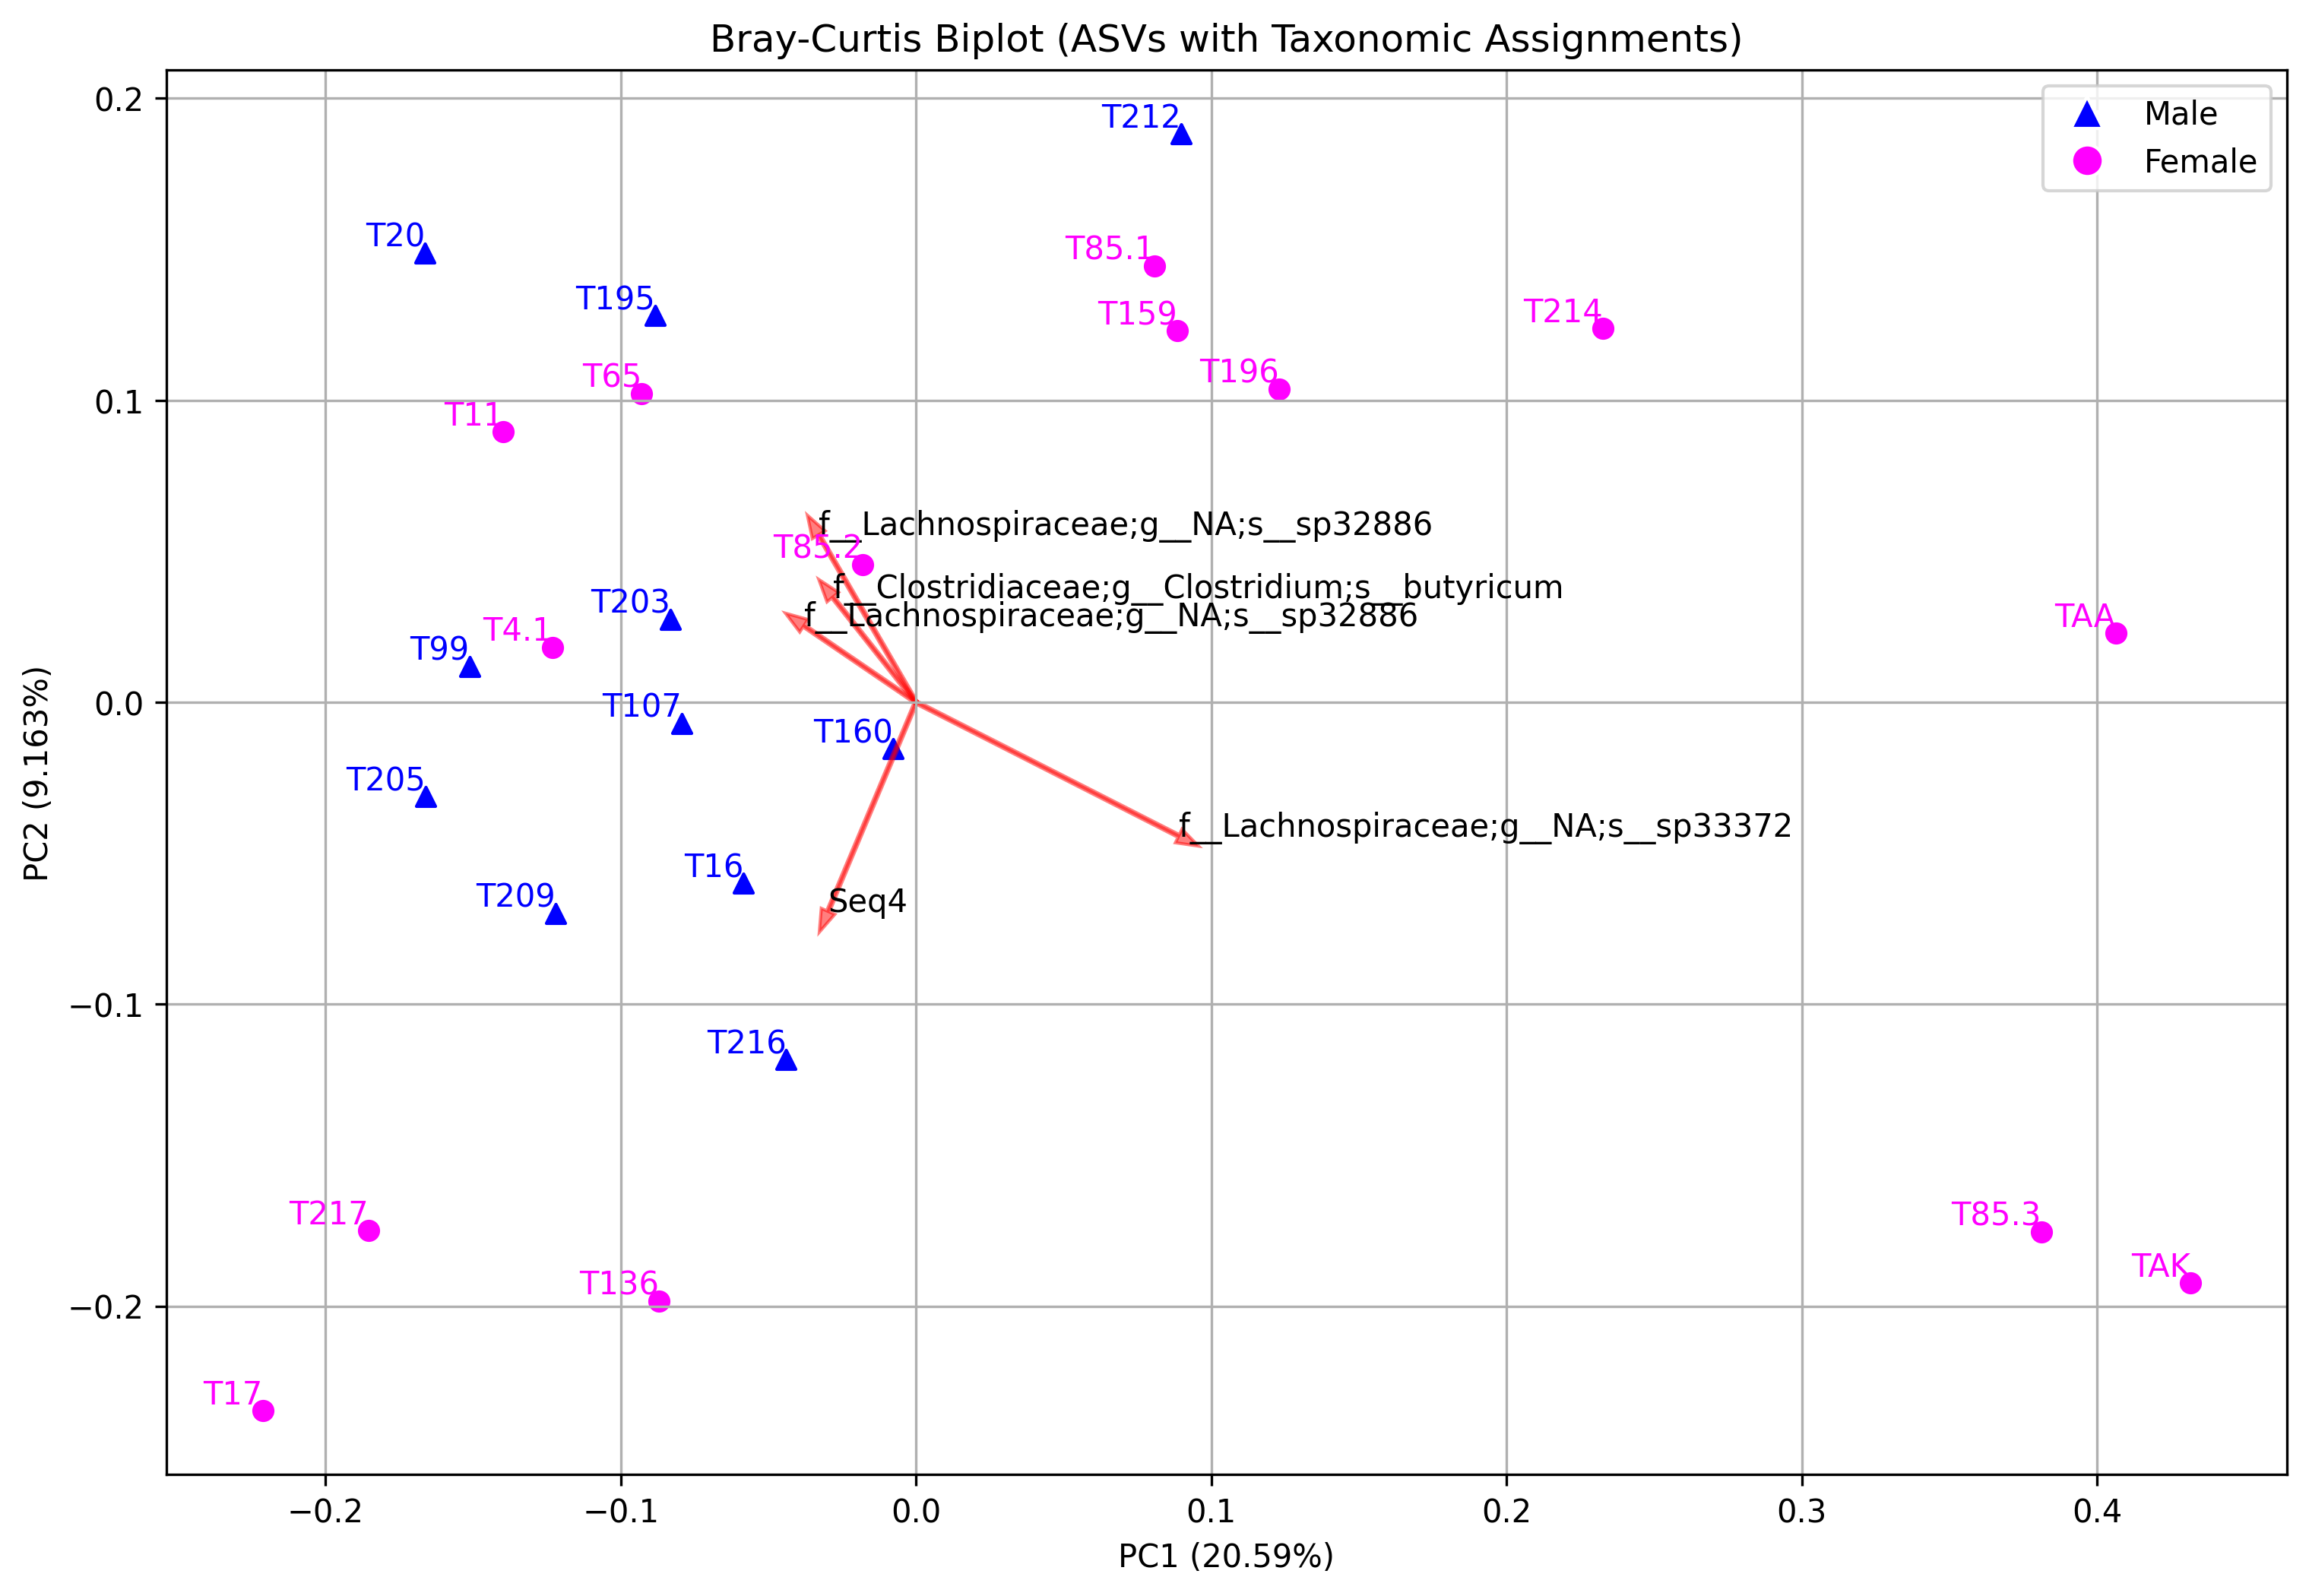

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Updated loadings with sequences 2, 3, 4, 8, and 13
loadings = {
    'seq': ['f__Lachnospiraceae;g__NA;s__sp32886', 'f__Clostridiaceae;g__Clostridium;s__butyricum', 'Seq4', 'f__Lachnospiraceae;g__NA;s__sp33372', 'f__Lachnospiraceae;g__NA;s__sp32886'],
    'PC1': [-0.037968022, -0.028180197, -0.029762223, 0.088978431, -0.032933484],
    'PC2': [0.025320453, 0.034811183, -0.069247813, -0.044288783, 0.055472628]
}

# Provided data
samples = {
    'Site': ['T159', 'T136', 'T16', 'T17', 'T11', 'T205', 'T209', 'T99', 'T107', 'T203',
             'TAA', 'TAK', 'T160', 'T4.1', 'T20', 'T214', 'T217', 'T216', 'T212', 'T65',
             'T195', 'T196', 'T85.2', 'T85.3', 'T85.1'],
    'PC1': [0.088424459, -0.087083212, -0.058345497, -0.221195732, -0.139786938, -0.166067617,
            -0.122075271, -0.15120632, -0.079338291, -0.083259956, 0.406312983, 0.431643148,
            -0.007650314, -0.123059654, -0.16628776, 0.232694381, -0.185451647, -0.043950995,
            0.089698157, -0.092910591, -0.088239354, 0.123061833, -0.017942797, 0.381130771,
            0.080886216],
    'PC2': [0.123017248, -0.198356088, -0.060009363, -0.234618556, 0.089494945, -0.031308774,
            -0.069964296, 0.011918052, -0.007022335, 0.02740614, 0.022982969, -0.192407168,
            -0.015448889, 0.018227141, 0.148751078, 0.123763591, -0.174969254, -0.118402238,
            0.188217637, 0.102259932, 0.128004995, 0.103811336, 0.045578899, -0.175433473,
            0.144506471]
}

# Manually input metadata with correct assignments
manual_metadata = {
    'Site': ['T159', 'T136', 'T16', 'T17', 'T11', 'T205', 'T209', 'T99', 'T107', 'T203',
             'TAA', 'TAK', 'T160', 'T4.1', 'T20', 'T214', 'T217', 'T216', 'T212', 'T65',
             'T195', 'T196', 'T85.2', 'T85.3', 'T85.1'],
    'Sex': ['F', 'F', 'M', 'F', 'F', 'M', 'M', 'M', 'M', 'M',
            'F', 'F', 'M', 'F', 'M', 'F', 'F', 'M', 'M', 'F',
            'M', 'F', 'F', 'F', 'F']
}

# Map 'Sex' to colors and markers
color_map = {'M': 'blue', 'F': 'magenta', 'Ukn': 'orange'}
marker_map = {'M': '^', 'F': 'o', 'Ukn': 's'}
colors = [color_map[sex] for sex in manual_metadata['Sex']]
markers = [marker_map[sex] for sex in manual_metadata['Sex']]

# Convert to numpy arrays for easier manipulation
loadings_pc1 = np.array(loadings['PC1'])
loadings_pc2 = np.array(loadings['PC2'])
samples_pc1 = np.array(samples['PC1'])
samples_pc2 = np.array(samples['PC2'])

# Given percentage variance for each PC
pc1_variance = 20.59  # PC1 variance percentage
pc2_variance = 9.163  # PC2 variance percentage

# Plotting the biplot with increased DPI
fig, ax = plt.subplots(figsize=(12, 8), dpi=300)

# Plot samples as points with different markers for males and females
for i in range(len(samples_pc1)):
    ax.scatter(samples_pc1[i], samples_pc2[i], color=colors[i], marker=markers[i], label=f'{samples["Site"][i]} ({manual_metadata["Sex"][i]})')

# Plot loadings as vectors
for i, txt in enumerate(loadings['seq']):
    ax.arrow(0, 0, loadings_pc1[i], loadings_pc2[i], color='red', alpha=0.5, head_width=0.005)
    ax.text(loadings_pc1[i], loadings_pc2[i], txt, color='black')

# Annotate samples
for i, txt in enumerate(samples['Site']):
    ax.text(samples_pc1[i], samples_pc2[i], txt, color=colors[i], ha='right', va='bottom')

ax.set_xlabel(f'PC1 ({pc1_variance}%)')
ax.set_ylabel(f'PC2 ({pc2_variance}%)')
ax.set_title('Bray-Curtis Biplot (ASVs with Taxonomic Assignments)')
ax.grid(True)

# Create a legend for male and female
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='^', color='w', label='Male', markersize=10, markerfacecolor='blue'),
                   Line2D([0], [0], marker='o', color='w', label='Female', markersize=10, markerfacecolor='magenta')]
ax.legend(handles=legend_elements, loc='upper right')


# Save the plot as a .tif file with 300 dpi
# plt.savefig('biplot.tif', format='tiff', dpi=300)
# Save the plot as a .tif file with 300 dpi to the specified directory
save_path = '/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/biplot.tif'
plt.savefig(save_path, format='tiff', dpi=300)

# Display the plot
plt.show()
